# Desarrollo de ejercicios del libro Learning from Data

### Ejercicio 1.2

Suponga que usamos un perceptron para detectar mensajes de spam. Podemos decir que cada correo es está representado por la frecuencia de ocurrencia de palabras clave, y la salida de el mensaje es $+1$ si el mensaje es considerado spam.

1. ¿Puedes pensar algunas palabras que tendrán con un peso grande en el perceptron?

    - Es posible que palabras como gratis, oferta, loteria, premio terminen con un gran peso positivo, pues estás por lo general se relacionan a correos que corresponden con spa m.

2.  ¿Que palabras tendrán un peso negativo?

    - Palabras como Hola, Coordial, Saludos, corresponden por lo general a palabras que se presentan en correos cotidianos y que por lo general no son spam, por lo que tendrían un peso negativo.

3. ¿Que parámetro en el perceptron afectará directamente afecta cuantos mensajes frontera terminaran siendo clasificados como spam? 

    - El parametro $b$ es el que determina estos casos borde. Pues precisamente $b$ es usado como el límite para clasificar entre spam y no spam.

### Ejercicio 1.3

La regla de actualización de peso en (1.3) tiene una buena interpretación de lo que se mueve correctamente en dirección de clasificar $x(t)$:

1. Muestre que $y(t)w^T(t)x(t) < 0$ 
    - si $x(t)$ se clasifica incorrectamente por $w(t)$, entonces se tiene que $w^T(t)x(t)$ y $y(t)$ tienen signos diferentes, luego $y(t)w^T(t)x(t) < 0$.

2.  Muestre que $y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)$ . 

   \begin{align}
    y(t)w^T(t+1)x(t) &= y(t)(w(t)+y(t)x(t))^Tx(t) \\
         &= y(t)(w^T(t)+y(t)x^T(t))x(t)\\
         &= y(t)w^T(t)x(t)+y(t)y(t)x^T(t)x(t)\\
         &> y(t)w^T(t)x(t)
    \end{align}
3. En lo que respecta a la clasificación de $x(t)$, argumenta que el movimiento desde $w(t)$ a $w(t+1 )$ es un movimiento ``en la dirección correcta''.

    - Se tiene que $y(t)w^T(t)x(t)$ se incrementa con cada actualización. Si $y(t)$ es positivo pero $w^T(t)x(t)$ es negativo, entonces $w^T(t)x(t)$ se mueve hacia la parte positiva, aumentándolo.
    Si $y(t)$ es negativo pero $w^T(t)x(t)$ es positivo, entonces $w^T(t)x(t)$ se mueve hacia la parte negativa, disminuyéndolo y de esta manera $y(t)w^T(t)x(t)$ aumenta.

    De esta manera moverse de $w(t)$ a $w(t+1)$ es un movimiento en la dirección correcta.


## Ejercicio 1.10

Este es un experimento que ilustra la diferencia entre un solo contenedor y múltiples contenedores. Realiza una simulación por computadora lanzando 1,000 monedas. Lanza cada moneda de forma independiente 10 veces. Enfoquémonos en 3 monedas de la siguiente manera: $c_{1}$ es la primera moneda lanzada; $c_{\text {rand }}$ es una moneda que eliges al azar; $c_{\min }$ es la moneda que tuvo la frecuencia mínima de caras (elige la más temprana en caso de empate). Sean $\nu_{1}, \nu_{\text {rand }}$ y $\nu_{\min }$ las fracciones de caras obtenidas para las respectivas tres monedas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

In [3]:
def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins) # store the sum of heads in total_flips
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

1. ¿Cuál es el valor esperado $\mu$ para las tres monedas seleccionadas?

In [4]:
total_coins = 1000
total_flips = 10
run_once(total_coins, total_flips, True)

Frequency of first coin: 0.5
Frequency of a random coin: id(12)-freq(0.4)
Frequency of the coin with minimum frequency: id(637)-freq(0.0)


(0.5, 0.4, 0.0)

2. Repita este experimento completo un gran número de veces (por ejemplo, 100,000 ejecuciones del experimento completo) para obtener varias instancias de $\nu_{1}, \nu_{\text {rand }}$ y $\nu_{\min }$, y traza los histogramas de las distribuciones de $\nu_{1}, \nu_{\text {rand }}$ y $\nu_{\min }$. Observe que las monedas que resulten ser $c_{\text {rand }}$ y $c_{\min }$ pueden variar de una ejecución a otra.


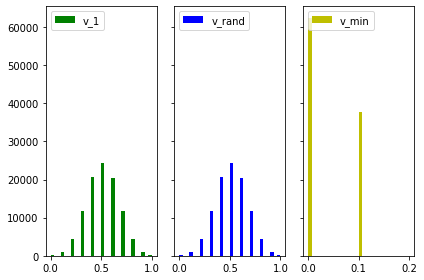

In [8]:
total_coins = 1000
total_flips = 10
total_runs = 100000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = run_once(total_coins, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 30
axs[0].hist(v1s,bins=n_bins,label='v_1', color='g')
axs[0].legend(loc='upper left')
axs[1].hist(vrands,bins=n_bins,label='v_rand', color='b')
axs[1].legend(loc='upper left')
axs[2].hist(vmins,bins=n_bins, label='v_min',color='y')
axs[2].legend(loc='upper left')

3. Utilizando $2)$, traza las estimaciones para $\mathbb{P}[|\nu-\mu|>\epsilon]$ en función de $\epsilon$, junto con la cota de Hoeffding $2 e^{-2 \epsilon^{2} N}$


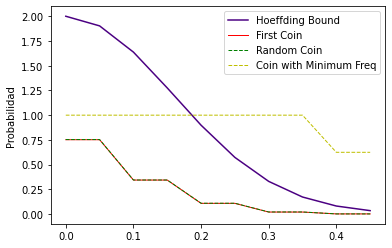

In [6]:
# Exercise 1.10 (c)
eps = np.arange(0.0,0.5,0.05)
bounds = hoeffding_bound(eps, total_flips)
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs

#plt.ylim((0,0.01))    
plt.plot(eps, bounds, color='indigo', label='Hoeffding Bound')
plt.plot(eps, p1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.ylabel('Probability')
plt.legend()

4. ¿Que monedas cumplen con la cota de Hoeffding y cuáles no?

    Se observa que la primera moneda y la moneda aleatoria sigue la desigualdad de Hoeffding y la moneda con la mínima frecuencia no la cumple, para la moneda $c_{min}$ no se cumple pues se viola el supuesto de que la hipótesis $h$ debe ser fija antes de generar los datos y el $c_{min}$ se escoje despues de correr el experimento.


### Ejercicio 1.11

Se nos proporciona un conjunto de datos $\mathcal{D}$ con 25 ejemplos de entrenamiento de una función objetivo desconocida $f: \mathcal{X} \rightarrow \mathcal{Y}$, donde $\mathcal{X}=\mathbb{R}$ y $\mathcal{Y}=\{-1,+1\}$. Para aprender $f$, utilizamos un conjunto de hipótesis simple $\mathcal{H}=\left\{h_{1}, h_{2}\right\}$ donde $h_{1}$ es la función constante +1 y $h_{2}$ es la función constante -1.

Consideramos dos algoritmos de aprendizaje, S (inteligente) y C (loco). S elige la hipótesis que concuerda más con $\mathcal{D}$ y C elige deliberadamente la otra hipótesis. Veamos cómo se desempeñan estos algoritmos fuera de la muestra desde los puntos de vista determinista y probabilístico. Supongamos, en el punto de vista probabilístico, que hay una distribución de probabilidad en $\mathcal{X}$, y sea $\mathbb{P}[f(\mathbf{x})=+1]=p$.



1.   ¿Puede S producir una hipótesis que garantice un mejor rendimiento que el azar en cualquier punto fuera de $\mathcal{D}$?
2.   Supongamos, para el resto del ejercicio, que todos los ejemplos en $\mathcal{D}$ tienen $y_{n}=+1$. ¿Es posible que la hipótesis que produce C resulte ser mejor que la hipótesis que produce S?
3.   Si $p=0.9$, ¿cuál es la probabilidad de que S produzca una hipótesis mejor que C?
4.   ¿Existe algún valor de $p$ para el cual sea más probable que no que C produzca una hipótesis mejor que S?

Desarrollo

1. No, $S$ no puede garantizar un mejor desempeño que el aleatorio para un punto por fuera de $D$

2. Si es posible, veamos el siguiente escenario:

    si $f$ tiene 25+1 en $D$ pero -1 en todos los demás puntos en $X$, $S$ va a escoger la hipótesis $h_1$ la cual no va a coincidir con $f$ por fuera de $D$. Por otra parte una función aleatoria va a coincidir con $f$ la mitad de las veces, lo cual va ha ser mejor que la función producida por $S$.

3. Si cada punto de $D$ tiene 1, entonces $S$ va ha escoger $h_1$ y $C$ va ha escoger $h_2$, luego por fuera de $D$, $h_1$ tendrá una probabilidad del 0.9 de coincidir con $f$, mientras que $h_2$ solo tendrá 0.1 de probabilidad . Luego $S$ produce una mejor hipótesis.

4. Es claro que si $p<0.5$ entonces $C$ va a producir una mejor hipotesis que $S$, pues $C$ produce $h_2$.

### Ejercicio 1.12

Una amiga se acerca a ti con un problema de aprendizaje. Dice que la función objetivo $f$ es completamente desconocida, pero tiene 4,000 puntos de datos. Está dispuesta a pagarte para resolver su problema y producirle un $g$ que aproxime a $f$. ¿Qué es lo mejor que puedes prometerle de las siguientes opciones?

1.   Después de aprender, le proporcionarás un $g$ que garantizará una buena aproximación de $f$ fuera de la muestra.
2.  Después de aprender, le proporcionarás un $g$, y con alta probabilidad el $g$ que produzcas aproximará bien a $f$ fuera de la muestra.
3. Ocurrirá una de las dos cosas.
  1.   Producirá una hipótesis $g$;
  2.   Declarará que fracasaste.

  Si devuelves una hipótesis $g$, entonces con alta probabilidad el $g$ que produzcas aproximará bien a $f$ fuera de la muestra.


Desarrollo

Lo más adecuado es comprometerse con la opción $c$, puesto que desconocemos por completo $f$, está puede ser muy compleja y puede que no se pueda aprender muy bien. Por otra parte como se tienen muchos puntos, si se llega a encontrar $g$, se tendría por la probabilidad de Hoeffding que el error de $g$ respecto a $f$ puede ser pequeño y de esta manera $g$ se aproximaría bien a $f$.